In [1]:
import ROOT
import sys,os,string,json
import makeCanvas

from Utilities import getListOfTypes,maxval,movetofront,getMapOfTypes,setXYLabels

def calculate(r=None):
    if  "job_cpu_time" in r and "job_wall_time" in r and float(r["job_wall_time"]) > 0:
        r["job_efficiency"] = float(r["job_cpu_time"])/float(r["job_wall_time"])
    else:
        r["job_efficiency"] = -.1
    if float(r["event_count"]) > 0 :
        r["time_per_event"] = float(r["duration"])/float(r["event_count"])
    

here = os.path.join(os.getenv("PWD"),"data")

print (here)

files = []
for (path, dirnames, filenames) in os.walk(here):
    for f in filenames:
        if "json" in f and "combined" not in f:
            files.append(os.path.join(path,f))
            
#print (files)

data = []
for f in files:
    #print (f)
    jsonfile = open(f,'r')
    thing = json.load(jsonfile)
    if thing["event_count"] == 0 :
        continue
    data.append(thing)
   # print (f,data)
    jsonfile.close()
    
o = open("combined.json",'w')
json.dump(data,o)
o.close()



Welcome to JupyROOT 6.24/06
/Users/schellma/Dropbox/LArWrapperExample/analysis/data


In [2]:
i = open("combined.json",'r')
records = json.load(i)



In [3]:
listofsites = getListOfTypes(data,"job_site",[])
nsites=len(listofsites)
mapofsites = getMapOfTypes(listofsites)

listofrses = getListOfTypes(data,"rse",[])
nrses = len(listofrses)
mapofrses = getMapOfTypes(listofrses)

print (mapofsites)

print (mapofrses)

hists = {}

colors = {"Requested":ROOT.kViolet,"Opened":ROOT.kRed,"Closed":ROOT.kGreen}

for name in ["Requested","Opened","Closed"]:
    hists[name] = ROOT.TH2D(name,name,nsites,0,nsites,nrses,0.,nrses)
    setXYLabels(hists[name],mapofsites,mapofrses)
    hists[name].SetLineColor(colors[name])
    hists[name].SetFillColor(colors[name])
    hists[name].GetXaxis().SetTitle("Job_Site")
    hists[name].GetYaxis().SetTitle("RSE")
    

{'BR_CBPF': 1, 'CH_UNIBE-LHEP': 2, 'NL_NIKHEF': 3, 'NL_SURFsara': 4, 'UK_RAL-Tier1': 5, 'US_Colorado': 6, 'US_FermiGrid': 7, 'US_Michigan': 8, 'US_SU-ITS': 9, 'US_Wisconsin': 10}
{'FNAL_DCACHE': 1, 'LANCASTER': 2, 'MANCHESTER': 3, 'QMUL': 4, 'RAL_ECHO': 5}


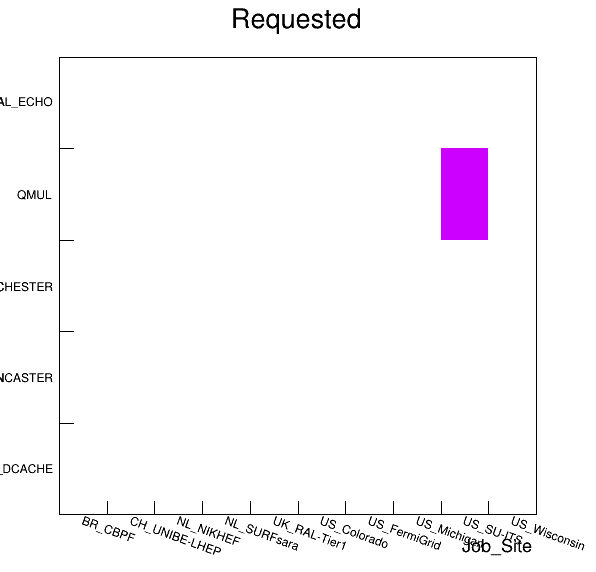

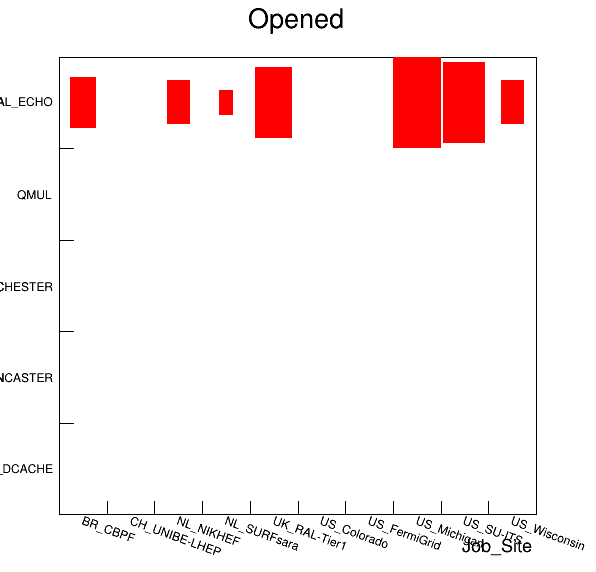

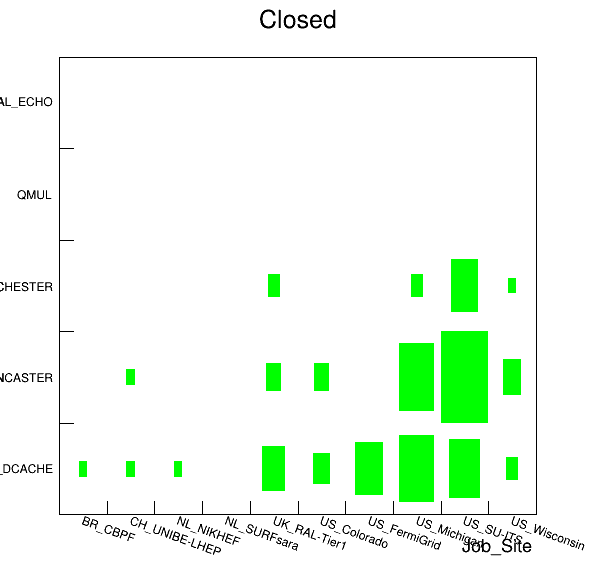

In [4]:
for r in data: 
    isite = mapofsites[r["job_site"]] -.5
    irse = mapofrses[r["rse"]]-.5
    state = r["final_state"]
    hists[state].Fill(isite,irse)
    
ROOT.gStyle.SetOptStat(0)

c ={}
for state in ["Requested","Opened","Closed"]:
    
    c[state] =ROOT.TCanvas(state,state,600,600)
    if state == "Requested": 
        opt = "box"
    else:
        opt = "box same"
    hists[state].Draw(opt)

    c[state].Draw()

    

Info in <TCanvas::Print>: jpg file c1.jpg has been created


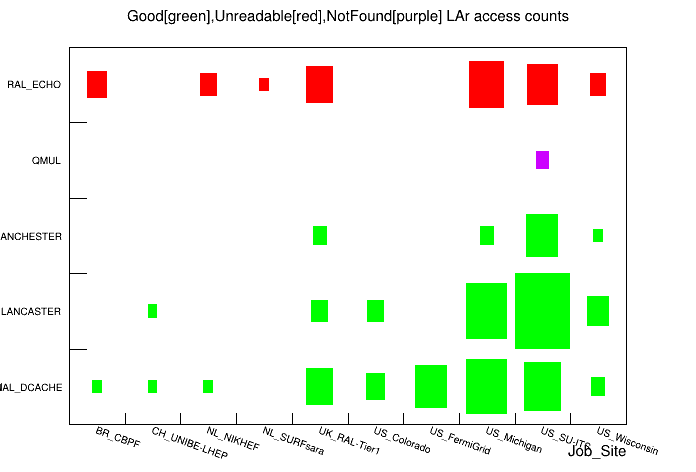

In [5]:
    
c1 = ROOT.TCanvas()
c1.cd()
hists["Combo"]=hists["Closed"].Clone("Combo")
hists["Combo"].SetTitle("Good[green],Unreadable[red],NotFound[purple] LAr access counts")
hists["Combo"].Draw("box")
hists["Opened"].Draw("box same")
hists["Requested"].Draw("box same")
c1.Draw()
c1.Print("c1.jpg","jpg")